# Description: 
This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (1).csv


In [0]:
# Get the data
log = pd.read_csv('Login.csv')

In [0]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [23]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets from the account
print("Show the 5 recents tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + "\n")
  i = i + 1

Show the 5 recents tweets: 

1) We don't yet have all the tools we need to stop the novel coronavirus and safely re-open the economy. But they are on the horizon. https://t.co/1q7YHRXokz

2) This is a great introduction to computer science concepts for students at all levels. I’m looking forward to joining today’s Code Break. https://t.co/Nzoaz4yAAe

3) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if that work is stopped no other organization can replace them. The world needs @WHO now more than ever.

4) .@NickKristof does an amazing job capturing the heroism of the health care workers on the front lines of the coronavirus fight. https://t.co/x1TgE2oNXE

5) On #WorldHealthDay — and every day — I want to thank all of the health heroes for their sacrifices and for keeping us safe. https://t.co/0x9QFSrlQb



In [24]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,We don't yet have all the tools we need to sto...
1,This is a great introduction to computer scien...
2,Halting funding for the World Health Organizat...
3,.@NickKristof does an amazing job capturing th...
4,On #WorldHealthDay — and every day — I want to...


In [25]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentioned
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)  # Removing the hyper link

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,We don't yet have all the tools we need to sto...
1,This is a great introduction to computer scien...
2,Halting funding for the World Health Organizat...
3,. does an amazing job capturing the heroism of...
4,On WorldHealthDay — and every day — I want to ...
...,...
95,Even a single child paralyzed by polio is one ...
96,"In Abu Dhabi this week, the world committed $2..."
97,.'s leadership has been a catalyst to India's...
98,The more I’ve learned about Alzheimer’s diseas...


In [26]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,We don't yet have all the tools we need to sto...,0.500000,0.500000
1,This is a great introduction to computer scien...,0.750000,0.800000
2,Halting funding for the World Health Organizat...,0.591667,-0.012500
3,. does an amazing job capturing the heroism of...,0.900000,0.600000
4,On WorldHealthDay — and every day — I want to ...,0.500000,0.500000
...,...,...,...
95,Even a single child paralyzed by polio is one ...,0.304762,0.209524
96,"In Abu Dhabi this week, the world committed $2...",1.000000,-1.000000
97,.'s leadership has been a catalyst to India's...,0.500000,0.500000
98,The more I’ve learned about Alzheimer’s diseas...,0.500000,0.500000


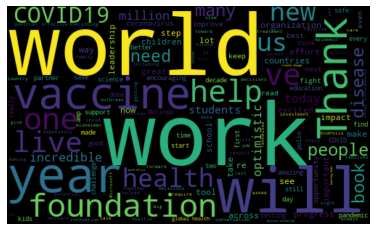

In [27]:
# Plot the Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,We don't yet have all the tools we need to sto...,0.500000,0.500000,Positive
1,This is a great introduction to computer scien...,0.750000,0.800000,Positive
2,Halting funding for the World Health Organizat...,0.591667,-0.012500,Negative
3,. does an amazing job capturing the heroism of...,0.900000,0.600000,Positive
4,On WorldHealthDay — and every day — I want to ...,0.500000,0.500000,Positive
...,...,...,...,...
95,Even a single child paralyzed by polio is one ...,0.304762,0.209524,Positive
96,"In Abu Dhabi this week, the world committed $2...",1.000000,-1.000000,Negative
97,.'s leadership has been a catalyst to India's...,0.500000,0.500000,Positive
98,The more I’ve learned about Alzheimer’s diseas...,0.500000,0.500000,Positive


In [29]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'): 
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) We don't yet have all the tools we need to stop the novel coronavirus and safely re-open the economy. But they are on the horizon. 

2) This is a great introduction to computer science concepts for students at all levels. I’m looking forward to joining today’s Code Break. 

3) . does an amazing job capturing the heroism of the health care workers on the front lines of the coronavirus fight. 

4) On WorldHealthDay — and every day — I want to thank all of the health heroes for their sacrifices and for keeping us safe. 

5) It’s encouraging to see the first projects begin from our effort to accelerate safe and effective drugs for COVID19. 

6) I’m excited to join the  Daily Homeroom today to talk about the incredible ways parents, teachers, and students are coming together to keep learning while schools are closed. 

7) If we make the right decisions now—informed by science, data and the experience of medical professionals—we can save lives and get the country back to work. You can rea

In [30]:
# print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if that work is stopped no other organization can replace them. The world needs  now more than ever.

2) I always enjoy chatting with , even though we had to sit a little bit further apart than usual this time. 

3) Extreme physical distancing measures will make a big difference in the U.S., but we need a consistent nationwide approach. Until the case numbers start to go down across America—which could take 10 weeks or more—no one can continue business as usual or relax the shutdown.

4) Science is giving us the opportunity to improve lives around the world faster than ever before. Today I was honored to give a speech on this subject at the  annual meeting. AAASmtg 

5) : The world must work together to slow the coronavirus outbreak, protect the most vulnerable, &amp; develop tools to control this ep…

6) Game on! 

7) It's gre

Text(0, 0.5, 'Subjectivity')

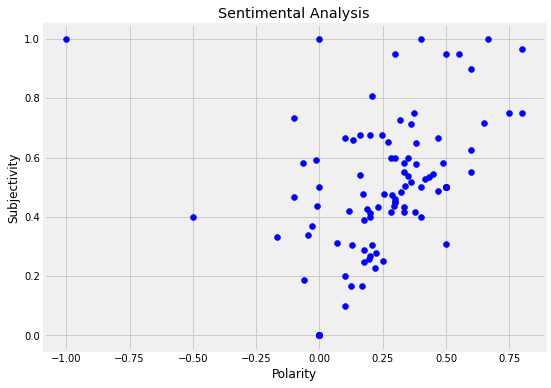

In [31]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentimental Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [33]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

80.0

In [34]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

11.0

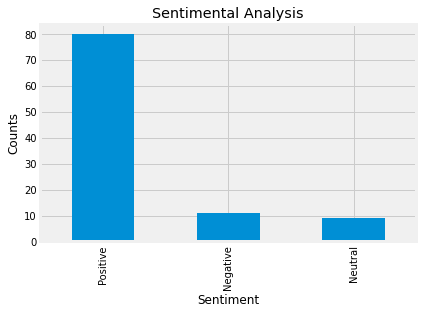

In [37]:
# Show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()